# A/B-тестирование 2024

Работа выполнена Нагаевой В.И. СКБ212

Большинство студентов уверено, что выполнение и сдача зачётных работ в последнии минуты дедлайна - это самый верный способ избежать лишнего стресса. Однако до сих пор широкой публике не было известно, является ли эта идея неоспоримым фактом или же результатом студентческой лени. Проверим эту гипотезу на тесте.

**Цель:** проверить гипотезу о том, что нет разницы, как сдавать работы - постепенно на протяжении всего модуля или в последний день - так как уровень полученного стресса будет одинаковым.

## Содержание:
<a href='#section1'> 1. Описание эксперимента </a> <br>
<a href='#section2'> 2. Ход эксперимента </a> <br>
<a href='#section3'> 3. А/А-тест </a> <br>
<a href='#section4'> 4. А/В-тест </a> <br>
<a href='#section5'> 5. Итоги </a> <br>

<a id='section1'></a>
## Описание эксперимента

План A/B-тестирования:

1. Высчитать метрики эксперимента.
2. Собрать n студентов Высшей школы экономики с указанием их направления и группы. Выдвигалось требование, что по учебной программе испытуемые должны были сдать некоторое количество зачётных работ к концу 4 модулей 2 семестра 3 курса. О студентах также заранее было известно, что все работы в 3 модуле они выполняли и сдавали на последней неделе поставленных сроков. А сами же сроки приходились на последние дни модуля.
3. Разделить студентов на две выборки А и В по n/2 человек в каждой. По мере прохождения по списку студенты делились следующим образом:
    - Каждый новый представитель той же группы или схожего направления отправлялся в отличную от предыдущего представителя выборку;
    - Студенты уникальных направлений или групп распределялись произвольно.
4. Провести А/А-тестирование, чтобы убедиться в однородности составленных выборок:
    - Опросить студентов, предоставив им возможность дать оценку уровню их стресса от 0 до 10 после сдачи всех работ в 3 модуле;
    - По полученным данным провести тест на равенство средних выборок.
5. В случае подтвержедения А/А-теста, провести А/В-тест:
    - Предоставить возможность представителям А выборке по-прежнему сдавать работы в последний момент;
    - Студентов выборки В смотивировать на сдачу по одной работе каждую неделю, начиная с первых дней 4 модуля;
    - Опросить студентов, предоставив им возможность дать оценку уровню их стресса от 0 до 10 после сдачи всех работ в 4 модуле;
    - По полученным данным провести тест на равенство средних значений выборок.
6. Подвести итоги.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as stests
import statsmodels.formula.api as smf

<a id='section2'></a>
## Ход эксперимента

### Подберем статистические метрики

Независимые, $Var(x_i) < \infty $ и $n \rightarrow \infty$:<br>
$x_1^c,...,x_{n_c}^c \sim \text{iid Bern}(p_c)$ <br>
$x_1^t,...,x_{n_t}^t \sim \text{iid Bern}(p_t)$ <br> <br>
Тогда ассимптотически по ЦПТ: <br>
$\overline{X_{n_c}} = \hat{p_c} \sim N(p_c, \frac{\hat{p_c}\cdot(1-\hat{p_c})}{n_c}) $ <br>
$\overline{X_{n_t}} = \hat{p_t} \sim N(p_t, \frac{\hat{p_t}\cdot(1-\hat{p_t})}{n_t}) $ <br> 
$ \hat{p_t} - \hat{p_t} \sim N(p_t - p_c, \frac{\hat{p_t}\cdot(1-\hat{p_t})}{n_t}+\frac{\hat{p_c}\cdot(1-\hat{p_c})}{n_c}) $ <br>
$z = \frac{\hat{p_t} - \hat{p_c}}{\sqrt{\frac{\hat{p_t}(1-\hat{p_t})}{n_t} + \frac{\hat{p_c}(1-\hat{p_c})}{n_c}}} \sim N(0,1) \text{, ассимптотически при верной $H_0$} $ <br> <br>

Следовательно, необходимо высчитать $n_t = q \cdot n$ и $n_c = (1-q) \cdot n$. При этом $\alpha = P(H_A | H_0), H_0: d = 0, H_A: d \geq MDE$. Тогда: <br>

$\beta = P(H_0|H_A) = P(\hat{d} < z_{1-\alpha} \cdot SE(\hat{d}) | d \geq MDE) = P(\hat{d} < z_{1-\alpha} \cdot SE(\hat{d}) | d = MDE) \Rightarrow$ <br> <br> 
$$\text{Ассимптотически нормальное при верности $H_0:$ } \hat{d} \sim N(0, SE^2(\hat{d}))$$
$$\text{Ассимптотически нормальное при верности $H_A:$ } \hat{d} \sim N(MDE, SE^2(\hat{d}))$$
<br> <br>
$$\Rightarrow P\left(\frac{\hat{d} - MDE}{SE(\hat{d})} < \frac{z_{1-\alpha} \cdot SE(\hat{d}) - MDE}{SE(\hat{d})} | d=MDE\right) = P\left(N(0,1) < \frac{z_{1-\alpha} \cdot SE(\hat{d}) - MDE}{SE(\hat{d})}\right) = F_{N(0,1)}\left(\frac{z_{1-\alpha} \cdot SE(\hat{d}) - MDE}{SE(\hat{d})}\right) = \beta $$
<br> <br>
$$\Rightarrow \frac{z_{1-\alpha}\cdot SE(\hat{d}) - MDE}{SE(\hat{d})} = z_{\beta}$$ <br>
$$\frac{MDE}{SE(\hat{d})} = z_{1-\alpha} - z_{\beta}$$<br>
$$SE(\hat{d}) = \frac{MDE}{z_{1-\alpha} + z_{1-\beta}}$$
Известно, что:
$$Var(\hat{d}) = \left(\frac{\hat{p_t}\cdot(1-\hat{p_t})}{(1-q)\cdot n}+\frac{\hat{p_c}\cdot(1-\hat{p_c})}{q\cdot n}\right) \cdot \frac{MDE^2}{(z_{1-\alpha} + z_{1-\beta})^2} $$ <br>
Утверждаем, что $q = 0.5$ и максимальное значение $p = 0.25$ (через производную $f(p) = p(1-p))$ <br> <br>
$$\Rightarrow n = \frac{\hat{p_t}\cdot(1-\hat{p_t}) + \hat{p_c}\cdot(1-\hat{p_c})}{0.5 \cdot MDE^2} \cdot (z_{1-\alpha} + z_{1-\beta})^2 \leq \frac{(z_{1-\alpha} + z_{1-\beta})^2}{MDE^2} $$

Зафиксируем размер эффекта. Подберем его в соответствии с классификацией Cohen's d - возьмем малый размах, равный 0.2, то есть средние значения двух групп отличаются на 0,5 стандартных отклонений.

In [2]:
def get_n(MDE, alpha, beta):
    z_a = st.norm().ppf(1 - alpha)
    z_b = st.norm().ppf(1 - beta)
    return ((z_a + z_b) / MDE)**2

In [3]:
MDE = 0.2

alpha = [i for i in np.arange(0.2, 0.3, 0.01)]
beta = [i for i in np.arange(0.2, 0.3, 0.01)]

errors = []
for a in alpha:
    cur = []
    for b in beta:
        e = get_n(MDE, a, b)
        cur.append(e)
    errors.append(cur)
df_e = pd.DataFrame(errors)
df_e.columns = alpha
df_e.index = beta
df_e

,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29
0.20,70.832630,67.901100,65.109927,62.446984,59.901702,57.464813,55.128148,52.884473,50.727353,48.651040
0.21,67.901100,65.031523,62.300590,59.696337,57.208333,54.827435,52.545584,50.355646,48.251275,46.226807
0.22,65.109927,62.300590,59.628236,57.081052,54.648744,52.322290,50.093740,47.956055,45.902977,43.928921
0.23,62.446984,59.696337,57.081052,54.589467,52.211421,49.938009,47.761386,45.674608,43.671503,41.746561
0.24,59.901702,57.208333,54.648744,52.211421,49.886331,47.664685,45.538741,43.501646,41.547311,39.670301
0.25,57.464813,54.827435,52.322290,49.938009,47.664685,45.493642,43.417237,41.428709,39.522047,37.691893
0.26,55.128148,52.545584,50.093740,47.761386,45.538741,43.417237,41.389331,39.448348,37.588359,35.804075
0.27,52.884473,50.355646,47.956055,45.674608,43.501646,41.428709,39.448348,37.553976,35.739742,34.000428
0.28,50.727353,48.251275,45.902977,43.671503,41.547311,39.522047,37.588359,35.739742,33.970422,32.275251
0.29,48.651040,46.226807,43.928921,41.746561,39.670301,37.691893,35.804075,34.000428,32.275251,30.623465


Известно, что чем больше наблюдений, тем ниже дисперсия. Возьмём среднее количество, для четности округлим: <br> <br> $$alpha = 0.25, beta = 0.25 \Rightarrow n_{min} = 44$$

In [4]:
alpha = 0.25
beta = 0.25
n = 44

### Работа с данными

In [5]:
df = pd.read_csv('data.txt', sep=' ')
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,Пол,Направление,Группа,Уровень стресса в 3 модуле,Уровень стресса в 4 модуле
0,м,Прикладная инженерия,БПИ215,8,NaN
1,м,Прикладная инженерия,БПИ213,7,NaN
2,м,Психология,БПс211,9,NaN
3,ж,Политология,БПо213,7,NaN
4,м,Психология,БПс211,7,NaN


In [19]:
df_A = pd.DataFrame(columns=['Пол', 'Направление', 'Группа', 'Уровень стресса в 3 модуле', 'Уровень стресса в 4 модуле'])
df_B = pd.DataFrame(columns=['Пол', 'Направление', 'Группа', 'Уровень стресса в 3 модуле', 'Уровень стресса в 4 модуле'])

for i in df['Направление'].unique():
    for k in df[df['Направление'] == i]['Группа'].unique():
        tmp = df[(df['Направление'] == i) & (df['Группа'] == k)].sort_values(by='Уровень стресса в 3 модуле')
        if len(df_A) < len(df_B):
            df_A = pd.concat([df_A, tmp[tmp.reset_index().index % 2 == 0]])
            df_B = pd.concat([df_B, tmp[tmp.reset_index().index % 2 == 1]])
        else:
            df_B = pd.concat([df_B, tmp[tmp.reset_index().index % 2 == 0]])
            df_A = pd.concat([df_A, tmp[tmp.reset_index().index % 2 == 1]])

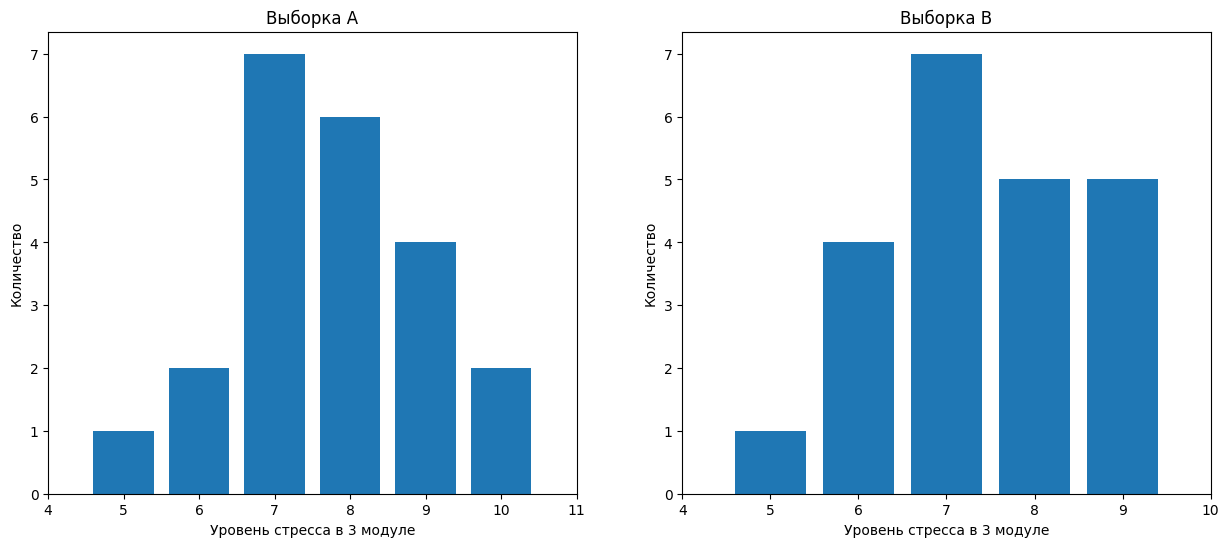

In [9]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
a = df_A['Уровень стресса в 3 модуле'].value_counts()
ax1.bar(a.index, a)
ax1.set_title('Выборка А')
ax1.set_xlabel('Уровень стресса в 3 модуле')
ax1.set_ylabel('Количество')
ax1.set_xlim([4,11])

ax2 = fig.add_subplot(122)
b = df_B['Уровень стресса в 3 модуле'].value_counts()
ax2.bar(b.index, b)
ax2.set_title('Выборка В')
ax2.set_xlabel('Уровень стресса в 3 модуле')
ax2.set_ylabel('Количество')
ax2.set_xlim([4,10])

plt.show()

<a id='section3'></a>
### Проведем А/А-тест

#### Z-test

В тестах будем использовать z тест, так как распределение данных предполагается нормальным по ЦПТ: <br><br>
$$z = \frac{\overline{X_1} - \overline{X_2}}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$$

Сначала проверим однородность выборок А и В. При верном разделении данных тест должен подтвердить, что данные в выборках собирались в одинаковых условиях И разницы между ними нет.<br>
$H_0$: Разных условий не было. ($\mu_c = \mu_t$)<br>
$H_1$: Разница была. ($\mu_c \neq \mu_t$)

In [10]:
A = list(df_A['Уровень стресса в 3 модуле'])
B = list(df_B['Уровень стресса в 3 модуле'])

if stests.ztest(x1=A, x2=B)[1] < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


Следовательно, выборки репрезентативные и на них можно проводить А/В-тест.

#### Linear Regression

Попробуем проверить гипотезы с помощью линейной регрессии для того, того чтобы повысить точность А/В-теста без увеличения размера выборки. Пусть:
$$ d_i =
  \begin{cases}
    1, & \text{если } i \in \text{treatment} \\
    0, & \text{иначе}
  \end{cases}
$$

Переформулируем гипотезы в терминах линейной регрессии:

$$y_i = w_0 + w_1 \cdot d_i + u_i,$$

где $w_0 = \mu_c$; $w_1 = \mu_t - \mu_c$; $u_i$ - случайная величина, олицитворяющая шум.

Варианты построения оценок на параметры:
1. Метод наименьших квадратов: минимизация MSE по $w \Rightarrow \hat{w} = (X^TX)^{-1}X^TY$;
2. Метод максимального правдоподобия при $u_i \sim N(0, \sigma^2)$

Предпоссылки к построению качественных (BLUE) оценок параметров:
1. Независимость: $(x_i, y_i)$ - независимы по i;
2. Экзогенность: данные собраны так, что все остальные факторы не влияют: $M(u_i|x_i) = 0$. Отсутствие эндогенности;
3. Гомоскедастичность: дисперсия ошибки не зависит от $x_i$: $Var(u_i|x_i) =\sigma^2 $. Отсутствие гетероскедастичности.
4. Нет линейнозависимых переменных в системе: $P(\text{rank }x = k) = 1$, где k - число столбцов. Отсутствие мультиколлинеарности;
5. Нет выбросов: $M(x_i^4) < \infty$, $M(y_i^4) < \infty$. 

При условии выполнения предпоссылок становится верна теорема Гаусса-Маркова: 
Оценки, построенные одним из двух методов, являются состоятельнами, несмещенными и эффективными в классе всех несмещенных линейных по у оценок. Так как нет выбросов, то по ЦПТ ассимптотически верно:
$$\left(\begin{array}{c}
      \hat{w_0} \\
      \hat{w_1}
    \end{array}
    \right) \sim N\left(\left(\begin{array}{c}
      w_0 \\
      w_1
    \end{array}
    \right), \sigma^2(X^TX)^{-1}\right)$$

Используя всё выше сказанное, расчитаем статистику:
- По методу наименьших квадратов:
$$\hat{w_1} = (X^TX)^{-1}X^TY \Rightarrow \hat{w_1} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2} \Rightarrow \hat{w_1} = \frac{\sum_{i=1}^n (x_i-\overline{x}) (y_i-\overline{y})}{\sum_{i=1}^n (x_i-\overline{x})^2} $$
- Оценка на дисперсию:
$$\hat{\sigma} = \frac{\sum_{i=1}^n (y_i-\overline{y})^2}{n-k-1} = \frac{RSS}{98} $$
- Статистика:
$$z = \frac{\hat{w_1}-\beta_0}{SE(\hat{w_1})} = \frac{(\hat{w_1}-\beta_0)\sqrt{\sum_{i=1}^n (d_i - \overline{d})^2}}{\sqrt{\frac{RSS}{98}}}$$

Тогда гипотезы для $\beta_0 = 0$: <br>
$H_0$: Разных условий не было. ($w_1 = \beta_0$) <br>
$H_1$: Разница была. ($w_1 \neq \beta_0$)

In [38]:
df_AA = pd.DataFrame(columns=['target', 'd_i'])
df_AA['target'] = df['Уровень стресса в 3 модуле']
df_AA['d_i'] = [1 if x in df_A.index else 0 for x in df_AA.index]

In [51]:
model = smf.ols('target ~ d_i', data=df_AA)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7345
Date:                Fri, 31 May 2024   Prob (F-statistic):              0.396
Time:                        01:29:22   Log-Likelihood:                -70.567
No. Observations:                  44   AIC:                             145.1
Df Residuals:                      42   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4091      0.263     28.222      0.000       6.879       7.939
d_i            0.3182      0.371      0.857      0.396      -0.431       1.067
==============================================================================
Omnibus:                        0.639   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.702
Skew:                          -0.077   Prob(JB):                        0.704
Kurtosis:                       2.401   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
p_value = 0.396
alpha = 0.05 # Так как построен 95% доверительный интервал

if p_value < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза не отвергается


### Данные для A/B-теста
Соберем новые данные в 4 модуле. Напомним, студенты из выборки А не меняли стратегию обучения и сдавали все работы на последней неделе. Представители выборки В сдавали по 1 работе в неделю на протяжении всего модуля.

In [13]:
df_A_new = pd.read_csv('data_A.txt', sep=' ')
df_B_new = pd.read_csv('data_B.txt', sep=' ')

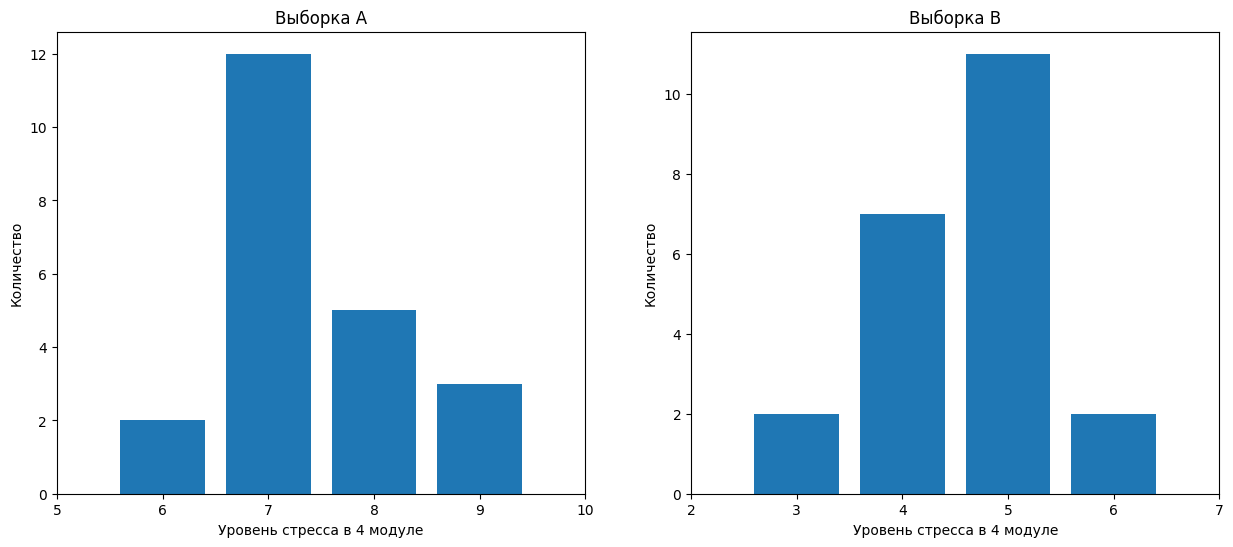

In [14]:
fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(121)
a = df_A_new['Уровень стресса в 4 модуле'].value_counts()
ax1.bar(a.index, a)
ax1.set_title('Выборка А')
ax1.set_xlabel('Уровень стресса в 4 модуле')
ax1.set_ylabel('Количество')
ax1.set_xlim([5,10])

ax2 = fig.add_subplot(122)
b = df_B_new['Уровень стресса в 4 модуле'].value_counts()
ax2.bar(b.index, b)
ax2.set_title('Выборка В')
ax2.set_xlabel('Уровень стресса в 4 модуле')
ax2.set_ylabel('Количество')
ax2.set_xlim([2,7])

plt.show()

<a id='section4'></a>
### Проведем А/В-тест

$H_0$: В среднем уровень стресса у студентов, которые сдают работы на последней неделе модуля, не отличается от уровня стресса тех, кто выполняет все работы заранее.<br>
$H_1$: Верно обратное.

#### Z-test

In [36]:
A_new = list(df_A_new['Уровень стресса в 4 модуле'])
B_new = list(df_B_new['Уровень стресса в 4 модуле'])

if stests.ztest(x1=A_new, x2=B_new)[1] < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза отвергается


#### Linear Regression

In [46]:
df_A_new['d_i'] = [1 for i in range(22)]
df_B_new['d_i'] = [0 for i in range(22)]
df_AB = pd.concat([df_A_new[['Уровень стресса в 4 модуле', 'd_i']], df_B_new[['Уровень стресса в 4 модуле', 'd_i']]])
df_AB.columns = ['target', 'd_i']

In [47]:
model = smf.ols('target ~ d_i', data=df_AB)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     128.1
Date:                Fri, 31 May 2024   Prob (F-statistic):           2.44e-14
Time:                        01:18:37   Log-Likelihood:                -52.984
No. Observations:                  44   AIC:                             110.0
Df Residuals:                      42   BIC:                             113.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5909      0.176     26.078      0.000       4.236       4.946
d_i            2.8182      0.249     11.320      0.000       2.316       3.321
==============================================================================
Omnibus:                        0.235   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.363
Skew:                           0.153   Prob(JB):                        0.834
Kurtosis:                       2.678   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
p_value = 0.000
alpha = 0.05 # Так как построен 95% доверительный интервал

if p_value < alpha:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

Гипотеза отвергается


<a id='section5'></a>
## Итоги

- В ходе данной работы была проверена правдоподобность гипотезы о том, что в среднем уровень стресса у студентов, которые сдают работы на последней неделе модуля, ниже, чем у тех, кто выполняет все работы заранее;
- До проведения А/В-теста, были высчитаны необходимые метрики для эксперимента: ошибка первого рода, мощность, эффект, минимальное количество испытаний;
- Был успешно проведен А/А-тест; 
- Гипотеза отверглась, следовательно, верна альтернативная: **В среднем уровень стресса у студентов, которые сдают работы на последней неделе модуля, отличается от уровня стресса у тех, кто выполняет все работы заранее.**